In [1]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
from rake_nltk import Rake 

In [4]:
df = pd.read_csv('Bangladesh_Post.csv')

In [5]:
df

,Serial,Headline,News,Date,Publisher
0,1,NaN,NaN,5/1/2022,Bangladesh Post
1,2,NaN,NaN,5/2/2022,Bangladesh Post
2,3,NaN,NaN,5/3/2022,Bangladesh Post
3,4,NaN,NaN,5/4/2022,Bangladesh Post
4,5,LPG price drops Tk 8.68 a kg,After 3 months of continuous upward trend in p...,5/5/2022,Bangladesh Post
...,...,...,...,...,...
1996,1997,Russia’s withdrawal may invite global hunger?,Russia’s decision to pull out of an agreement ...,10/31/2022,Bangladesh Post
1997,1998,Arrest of public servants\nBill withdrawn from...,"The Public Service (Amendment) Bill, 2022 was ...",10/31/2022,Bangladesh Post
1998,1999,Bangladesh can raise up to $12.5b in addl fina...,Bangladesh can raise up to $12.5 billion in ad...,10/31/2022,Bangladesh Post
1999,2000,Bankrupt Sri Lanka’s inflation dips to 66pc,Inflation in crisis-hit Sri Lanka dipped margi...,10/31/2022,Bangladesh Post


In [6]:
df.isnull().sum() 

Serial        0
Headline     12
News         12
Date          0
Publisher     0
dtype: int64

In [7]:
df.nunique()

Serial       2001
Headline     1979
News         1989
Date          184
Publisher       1
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Serial     2001 non-null   int64 
 1   Headline   1989 non-null   object
 2   News       1989 non-null   object
 3   Date       2001 non-null   object
 4   Publisher  2001 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Publisher', ylabel='count'>

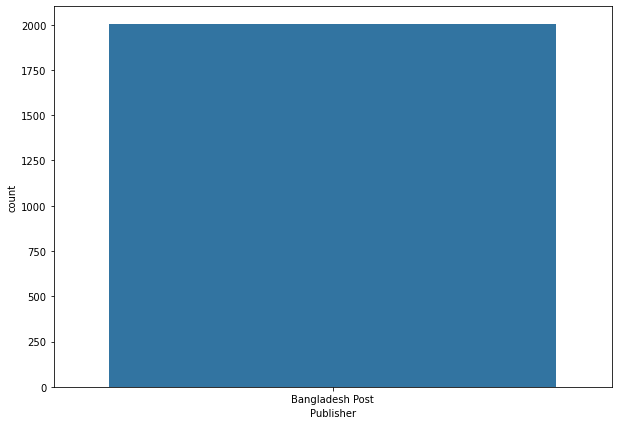

In [10]:
plt.figure(figsize=(10,7))

sns.countplot(x='Publisher', data=df)

In [11]:
df['combined_text'] = df['Headline'].map(str) +" "+ df['News'].map(str) 

In [12]:
df

,Serial,Headline,News,Date,Publisher,combined_text
0,1,NaN,NaN,5/1/2022,Bangladesh Post,nan nan
1,2,NaN,NaN,5/2/2022,Bangladesh Post,nan nan
2,3,NaN,NaN,5/3/2022,Bangladesh Post,nan nan
3,4,NaN,NaN,5/4/2022,Bangladesh Post,nan nan
4,5,LPG price drops Tk 8.68 a kg,After 3 months of continuous upward trend in p...,5/5/2022,Bangladesh Post,LPG price drops Tk 8.68 a kg After 3 months of...
...,...,...,...,...,...,...
1996,1997,Russia’s withdrawal may invite global hunger?,Russia’s decision to pull out of an agreement ...,10/31/2022,Bangladesh Post,Russia’s withdrawal may invite global hunger? ...
1997,1998,Arrest of public servants\nBill withdrawn from...,"The Public Service (Amendment) Bill, 2022 was ...",10/31/2022,Bangladesh Post,Arrest of public servants\nBill withdrawn from...
1998,1999,Bangladesh can raise up to $12.5b in addl fina...,Bangladesh can raise up to $12.5 billion in ad...,10/31/2022,Bangladesh Post,Bangladesh can raise up to $12.5b in addl fina...
1999,2000,Bankrupt Sri Lanka’s inflation dips to 66pc,Inflation in crisis-hit Sri Lanka dipped margi...,10/31/2022,Bangladesh Post,Bankrupt Sri Lanka’s inflation dips to 66pc In...


In [13]:
df.to_csv('cleaned26.csv')

In [14]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = [] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [15]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
# applying all of these functions to the our dataframe 
df['combined_text'] = df['combined_text'].map(clean_text)
df['tokens'] = df['combined_text'].map(tokenize)
df['tokens'] = df['tokens'].map(remove_stopwords)
df['lems'] =df['tokens'].map(lemmatize)

In [20]:
df.head()

,Serial,Headline,News,Date,Publisher,combined_text,tokens,lems
0,1,NaN,NaN,5/1/2022,Bangladesh Post,nan nan,"[nan, nan]",nan nan
1,2,NaN,NaN,5/2/2022,Bangladesh Post,nan nan,"[nan, nan]",nan nan
2,3,NaN,NaN,5/3/2022,Bangladesh Post,nan nan,"[nan, nan]",nan nan
3,4,NaN,NaN,5/4/2022,Bangladesh Post,nan nan,"[nan, nan]",nan nan
4,5,LPG price drops Tk 8.68 a kg,After 3 months of continuous upward trend in p...,5/5/2022,Bangladesh Post,lpg price drops tk a kg after months of con...,"[lpg, price, drops, tk, kg, months, continuous...",lpg price drop tk kg month continuous upward t...


In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['Full_News'] = line
    results.append(pol_score)

In [23]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in df['Publisher'] :
    temp.append(line)
headlines_polarity['Publisher'] =temp

In [24]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.1, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polarity.loc[headlines_polarity['compound'] < -0.1, 'label'] = -1
# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['Full_News'].apply(lambda x: len(str(x).split()))

In [25]:
headlines_polarity.head()

,neg,neu,pos,compound,Full_News,Publisher,label,word_count
0,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
1,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
2,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
3,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
4,0.074,0.851,0.075,0.2732,lpg price drop tk kg month continuous upward t...,Bangladesh Post,1,188


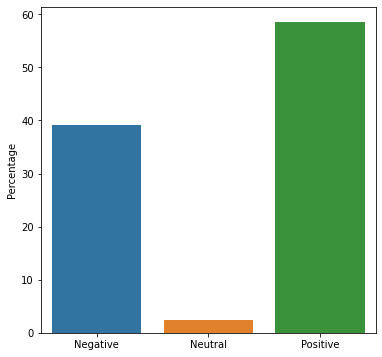

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 6))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

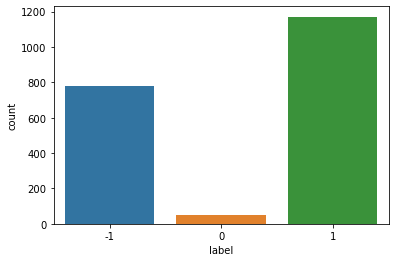

In [27]:
sns.countplot(x='label', data=headlines_polarity)

In [28]:
headlines_polarity.groupby("label").size()/len(headlines_polarity) * 100

label
-1    39.080460
 0     2.398801
 1    58.520740
dtype: float64

In [29]:
headlines_polarity['label'].value_counts()

 1    1171
-1     782
 0      48
Name: label, dtype: int64

<AxesSubplot:xlabel='Publisher', ylabel='count'>

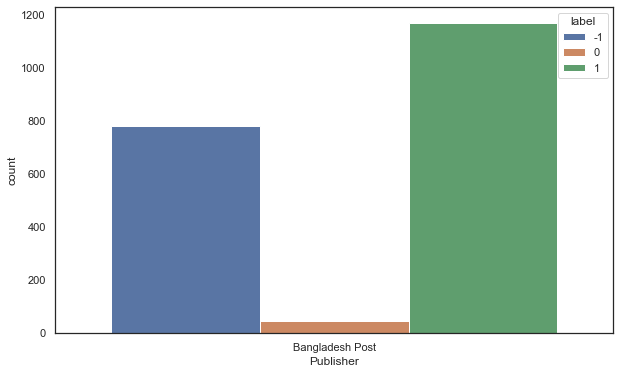

In [30]:
sns.set(style='white')
plt.figure(figsize=(10,6))
#create grouped bar chart
sns.countplot(x='Publisher', hue='label', data=headlines_polarity)

In [31]:
headlines_polarity

,neg,neu,pos,compound,Full_News,Publisher,label,word_count
0,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
1,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
2,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
3,0.000,1.000,0.000,0.0000,nan nan,Bangladesh Post,0,2
4,0.074,0.851,0.075,0.2732,lpg price drop tk kg month continuous upward t...,Bangladesh Post,1,188
...,...,...,...,...,...,...,...,...
1996,0.152,0.731,0.117,-0.9904,russia withdrawal may invite global hunger rus...,Bangladesh Post,-1,740
1997,0.177,0.749,0.074,-0.9743,arrest public servant bill withdrawn j light h...,Bangladesh Post,-1,208
1998,0.103,0.664,0.233,0.9975,bangladesh raise b addl financing climate acti...,Bangladesh Post,1,520
1999,0.213,0.729,0.057,-0.9855,bankrupt sri lanka inflation dip pc inflation ...,Bangladesh Post,-1,202


In [32]:
headlines_polarity.isnull().sum() 

neg           0
neu           0
pos           0
compound      0
Full_News     0
Publisher     0
label         0
word_count    0
dtype: int64

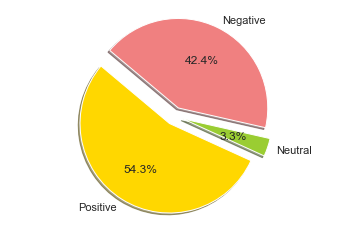

In [33]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [54.305365, 3.259972, 42.434663]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [34]:
headlines_polarity.to_csv('cleaned31.csv')

In [35]:
headlines_polarity.nunique()

neg            307
neu            394
pos            306
compound       850
Full_News     1989
Publisher        1
label            3
word_count     558
dtype: int64

In [36]:
!pip install wordcloud

In [37]:
from wordcloud import WordCloud

In [38]:
stop = ["https", "co", "char","chars"] + list(stopwords.words('english'))
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(df['combined_text']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['combined_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df2= headlines_polarity

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df2['Full_News'][df2['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df2['Full_News'][df2['label']==-1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# frequent words visualization for neutral
all_words = " ".join([sentence for sentence in df2['Full_News'][df2['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=5, stop_words='english')
bow = bow_vectorizer.fit_transform(headlines_polarity['Full_News'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, headlines_polarity['label'], random_state=42, test_size=0.30)

LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
#LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
pred= model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,pred))

In [ ]:
pred= model.predict(x_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve,auc

In [ ]:
def plot_roc(y_test, probs): 
    fpr,tpr, threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr, tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr, tpr, label='AUC=%0.2f'%roc_auc, color="darkorange")
    plt.legend(loc= 'lower right')
    plt.plot([0,1], [0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 

In [ ]:
pred_prob = model.decision_function(x_test)

NV

In [ ]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_Classifier = MultinomialNB()
NB_Classifier.fit(x_train, y_train)

In [ ]:
pred_nb = NB_Classifier.predict(x_test)

In [ ]:
accuracy_score(y_test, pred_nb)

In [ ]:
print(classification_report(y_test, pred_nb))

In [ ]:
pred_nb = NB_Classifier.predict(x_test)
cm = confusion_matrix(y_test,pred_nb)
sns.heatmap(cm, annot = True)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
nb_pred_prob = NB_Classifier.predict_proba(x_test) [:,1]

SVM

In [ ]:
#svm
from sklearn import svm
from sklearn import metrics

In [ ]:
cls = svm.SVC(kernel = "linear")

In [ ]:
cls.fit(x_train, y_train)

In [ ]:
pred = cls.predict(x_test)

In [ ]:
print("accuracy:", metrics.accuracy_score(y_test,y_pred = pred))

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
y_pred= cls.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
prob_y_pred= cls.decision_function(x_test)

SVC

In [ ]:
#LinearSVC
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print(svc_acc)

In [ ]:
print("test accuracy:  {: .2f}%" .format(svc_acc*100))

In [ ]:
print(classification_report(y_test,svc_pred))

In [ ]:
cm = confusion_matrix(y_test,svc_pred)
sns.heatmap(cm, annot = True)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
svc_pred_prob = SVCmodel.decision_function(x_test)

In [ ]:
plot_roc(y_test, svc_pred_prob)

RF

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train) 
pred_rf=rf.predict(x_test) 

In [ ]:
rf_acc = accuracy_score(pred_rf, y_test)
print(rf_acc)

In [ ]:
print(classification_report(y_test,pred_rf))

In [ ]:
pred_rf= rf.predict(x_test)
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, annot = True)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
prob_rf= rf.predict_proba(x_test) [:,1]

In [ ]:
plot_roc(y_test, prob_rf)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
knn_acc = accuracy_score(y_pred_knn, y_test)
print(knn_acc)

In [ ]:
print(classification_report(y_test,y_pred_knn))

In [ ]:

cm = confusion_matrix(y_test,y_pred_knn)


In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['-1','0','1'], 
                     columns = ['-1','0','1'])

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
prob_knn = knn.predict_proba(x_test) [:,1]

In [ ]:
plot_roc(y_test, prob_knn)